# Question 1

### Question 1a. How long is the reference genome?


input: `(base) [~/qbb2020-answers/qbl-week1]samtools faidx ref.fa`

input: `(base) [~/qbb2020-answers/qbl-week1]head ref.fa.fai`

output: `Halomonas       233806  11      70      71`

The reference genome, Halomonas, is 233806 bps long

### Question 1b. How many reads are provided and how long are they? 

Using FastQC, we find the following reads:

In [1]:
import pandas as pd 
seq_nums = [['frag.180.1', 35178], ['frag.180.2', 35178], ['jump2k.1', 70355], ['jump2k.2', 70355]] 
df_seq_nums = pd.DataFrame(seq_nums, columns = ['File', 'Total Sequences']) 
df_seq_nums 

,File,Total Sequences
0,frag.180.1,35178
1,frag.180.2,35178
2,jump2k.1,70355
3,jump2k.2,70355


Total:

In [2]:
total_reads = df_seq_nums['Total Sequences'].sum()
total_reads

211066

### Question 1c. How much coverage do you expect to have? 

In [3]:
genome = 233806
read_lengths = 100
total_reads = 211066

coverage = (total_reads * read_lengths) / genome
print("exepect coverage of",coverage,"times")


exepect coverage of 90.27398783606922 times


### Question 1d. Plot the average quality value across the length of the reads

`see screenshot images in the folder qbb2020-answers/qbl-week1/screenshots`

# Question 2: Kmer analysis

### Question 2a. How many kmers occur exactly 50 times?

Use jellyfish to count 21 bp kmers:

input: `jellyfish count -m 21 -C -s 1000000 *.fq` 

make histogram of kmer counts and pipe to new txt file:

input: `jellyfish histo mer_counts.jf > 21mer_counts.txt`

In [4]:
jf_df = pd.read_csv('data/21mer_counts.txt', sep=" ", header=None) #reads the jellyfish output file
jf_df.columns = ["occurrences", "uniqe_kmers"] #creates dataframe from jellyfish data

display(jf_df) # displays entire dataframe to make sure that worked
display(jf_df.iloc[49]) # finds 50th row for "how many kmers occur 50 times"

,occurrences,uniqe_kmers
0,1,1408358
1,2,58383
2,3,2061
3,4,57
4,5,12
...,...,...
80,97,1
81,98,2
82,101,1
83,104,2


occurrences      50
uniqe_kmers    1091
Name: 49, dtype: int64

### Question 2c. What is the estimated genome size based on the kmer frequencies? 

Results from GenomeScope:

`GenomeScope version 1.0`
`k = 21`

`property                      min               max               
Heterozygosity                0.00375116%       0.0157524%        
Genome Haploid Length         233,468 bp        233,805 bp        
Genome Repeat Length          -257 bp           -257 bp           
Genome Unique Length          233,725 bp        234,062 bp        
Model Fit                     98.7622%          NA%               
Read Error Rate               0.801898%         0.801898%`

### Question 2d. How well does the GenomeScope genome size estimate compare to the reference genome? 
Based on the GenomeScope results, the estimated genome size is between **233,468** and **233,805** basepairs, which is very close to the reference genome size of **233,806**

# Question 3: de novo assembly

### Question 3a. How many contigs were produced?

Assemble the reads using Spades:

`spades.py --pe1-1 frag180.1.fq --pe1-2 frag180.2.fq --mp1-1 jump2k.1.fq --mp1-2 jump2k.2.fq -o asm -k 31`

### Question 3a. How many contigs were produced? [Hint: try grep -c '>' contigs.fasta]

input: `grep -c '>' contigs.fasta`

output: `4`

### Question 3b. What is the total length of the contigs? 

Use samtools to create a file with contig information:

input: `samtools faidx asm/contigs.fasta`

Sort file by largest contig length (for question 3c below):

input: `sort -n asm/contigs.fasta.fai > contigs.fasta.fai`

To find total length of the four contigs:


In [5]:
df_contigs = pd.read_csv('asm/contigs.fasta.fai', sep="\t", header=None) #read samtools faidx file
df_contigs.columns = ["name","contig_length","offset","linebases","linewidth"]

display(df_contigs) # show the output of the contigs file

total_contigs_length = df_contigs['contig_length'].sum()
print("total length of all the contigs:",total_contigs_length)


,name,contig_length,offset,linebases,linewidth
0,NODE_1_length_105831_cov_20.671371,105831,36,60,61
1,NODE_2_length_47861_cov_20.231319,47861,107666,60,61
2,NODE_3_length_41352_cov_20.588756,41352,156360,60,61
3,NODE_4_length_39423_cov_20.384723,39423,198437,60,61


total length of all the contigs: 234467


### Question 3c. What is the size of your largest contig? 

Answer: 105831

### Question 3d. What is the contig N50 size?

In [6]:
target = genome*0.5
print("half the size of the genome:",target)

#instead of writing a script, I'm going to be lazy and just look at the four contigs by hand:
N50 = 105831 + 47861
print ("sum of contig1 and contig2:",N50)

half the size of the genome: 116903.0
sum of contig1 and contig2: 153692


The contig N50 size is `47861`

# Question 4. Whole Genome Alignment

For these questions, see files in MUMer folder.

### Question 4a. What is the average identity of your assembly compared to the reference?

Answer: **100%**

### Question 4b. What is the length of the longest alignment?

input: `show-coords -r -g out.delta`

output:

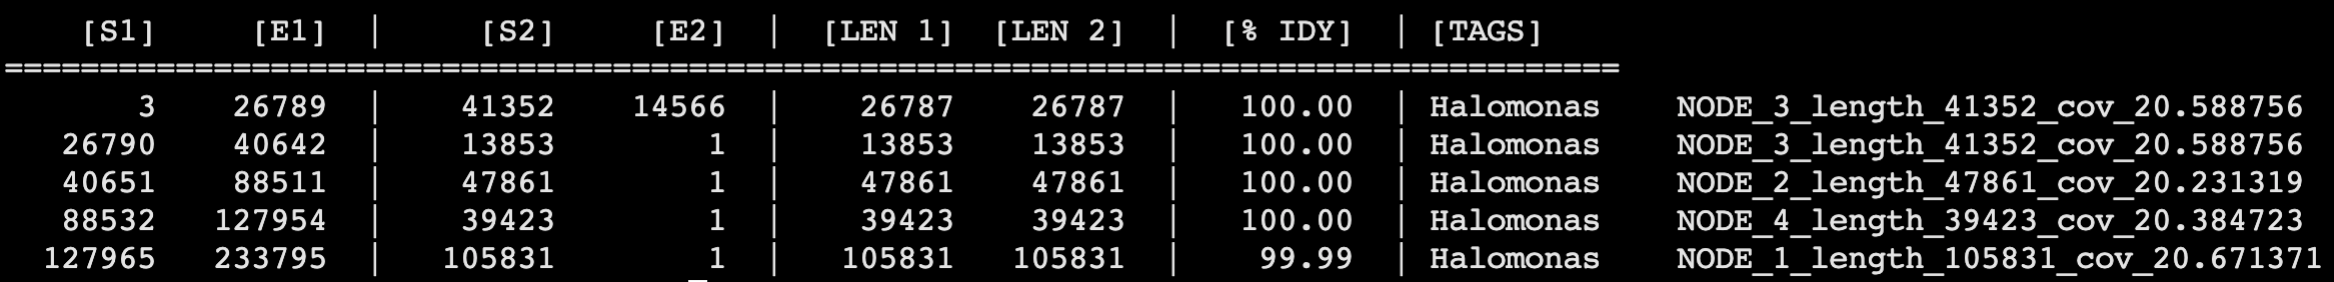

the longest alignment is also the longet contig: **105,831** bp

### Question 4c. How many insertions and deletions are in the assembly?
The out.report file indicates that there are **712** bp insertions and **51** deletions compared to the reference genome.


# Question 5. Decoding the insertion

### Question 5a. What is the position of the insertion in your assembly? 

See `show-coords` output above. The insertion is after nucleotide 26789 in the reference genome

### Question 5b. How long is the novel insertion?

In [10]:
# the length of the insertion will be the length of the whole contig,
# minus the lengths of all the matched alignments to the reference
insertion = 41352 - 26787 - 13853
print("the novel insertion is",insertion,"bp long")

the novel insertion is 712 bp long


### Question 5c. What is the DNA sequence of the encoded message?

input: `samtools faidx asm/contigs.fasta NODE_3_length_41352_cov_20.588756:13854-14565 > insertion.txt`

sequence:

NODE_3_length_41352_cov_20.588756:13854-14565

TAACGATTTACATCGGGAAAGCTTAATGCAATTCACGCAGATATTCAGCTTAGAAGGTAC
GCAGCGGTGACGGGGTGCGGTCCATAATCTATGAAGCTATGAATTCGTACCTCAAGTAAT
GTTTTCTTCGCTGCAGTTCAGAAGTGATAAAGGTATCCCGCTTAGCCTGGCATACTTTGT
GCGTTCGTACCGCCCAGCATTAATGACTTGTGTAGGCAAGTAATGAACGACTCTTCTACG
CCGCGCCTAACCTCCGCACATAATGGCAGCATGTGGTAGTTACATACGCACAGAAGTGGT
TCGGTTTTAACTATAGTCAGATATGAATAAGCTGCGTGTGTCGTTGTGTCGGCGTGTCGT
ACTTACCTCCTGACATAGGTGAATTTCAGCCTACTGTAAGTTTGGAGTCGCGCTCTTTTC
TTATTATATTCTTTGGTATGTGTGTGATGGGTTCGGGCGTGTATTGATGTCTCTAAGGCT
CATGTTAGTGTTTATTTGGTCAGTTATGACGGTGTTCCTGTCGTACGTGTTGGCTTAGCG
GACTTGTAGACGGGATCAAGGTTGTCTGACCCTCCGGTCGACCGTGGGTCGGCCGTCCCG
GCCAGAATACAAGCCGCTTAGACTTTCGAAAGAGGGTAAGTTACTACGCGCGAACGTTAT
ACCTCGTTTCAGTATGCACTCCCTTAAGTCACTCAGAAAAGACTAAGGGGCT


### Question 5c. What is the secret message?

input: `python ported_decoder.py -d --rev_comp --input 'insertion.txt'`

output: `Congratulations to the 2020 CMDB @ JHU class!  Keep on looking for little green aliens...`
